# Case study on Unsupervised learning

Dataset: 'Wine.csv'

Do the following in the wine dataset.
1. Read the dataset to the python environment.
2. Try out different clustering models in the wine dataset.
3. Find the optimum number of clusters in each model and create the model with
    the optimum number of clusters.

### Importing relevant libraries:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch

## 1. Loading the dataset into python environment:

In [2]:
df = pd.read_csv('Data/Wine.csv')
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## Preprocessing the dataset: 

In [3]:
df.shape

(178, 13)

### Insight: It has 178 wine samples with 13 features for different chemical properties

In [4]:
df.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

 ## 2.Trying different clustering models in the wine dataset.

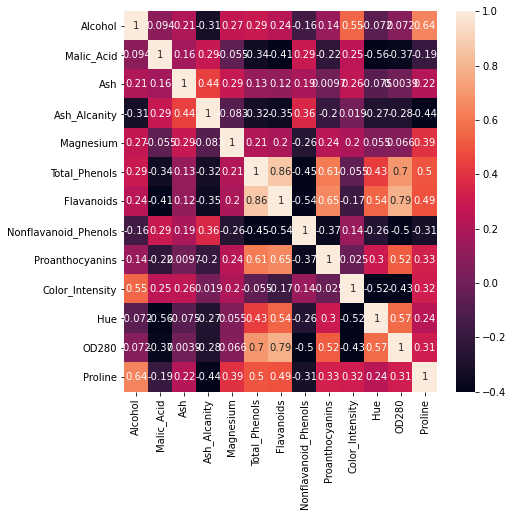

In [9]:
plt.figure(figsize=(7, 7))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, vmin=-0.4)
plt.show()

### Insight: From the above heatmap, we can see that there are some variables showing very high postive and negative correlation.

In [11]:
X = df.copy(deep=True)

In [13]:
scale = StandardScaler()
X = scale.fit_transform(X)

## Clustering Methods:-

## (1) K-Means Clustering:

### Elbow method to find no.of optimal clusters:

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

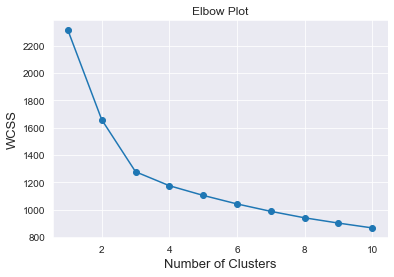

In [23]:
sns.set_style('darkgrid')
plt.plot(range(1,11), wcss, marker='o')
plt.xlabel('Number of Clusters', fontsize=13)
plt.ylabel('WCSS', fontsize=13)
plt.title('Elbow Plot')
plt.show()

In [20]:
score=[]
for i in range(2,10):
    k = KMeans(i)
    k.fit(X)
    score.append(np.round(silhouette_score(X,k.labels_),2))

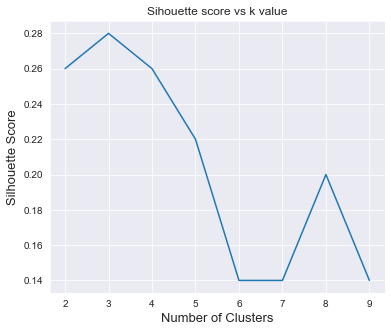

In [24]:
plt.figure(figsize=(6,5))
plt.plot(range(2,10),score)
plt.xlabel('Number of Clusters', fontsize=13)
plt.ylabel('Silhouette Score', fontsize=13)
plt.title('Sihouette score vs k value')
plt.show()

### Insight: No. of clusters can be selected as 3

In [25]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans.fit(X)
y_kmeans = kmeans.fit_predict(X)

In [26]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

### Insight: Samples are grouped to 3 K-Means clusters

## (2) Hierarchical - Agglomerative Clustering

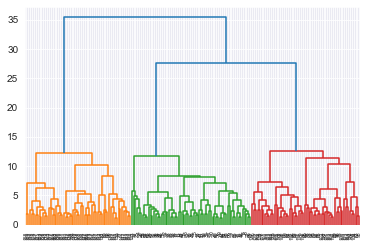

<Figure size 576x432 with 0 Axes>

In [31]:
links = sch.linkage(X, method='ward')
dendrogram = sch.dendrogram(links)
plt.figure(figsize=(8, 6))
plt.show()

### Insight: Horizontal line cuts the dendrogram at 3 points. Therfore no. of clusters can be taken as 3

### Agglomerative Clustering for 3 clusters

In [32]:
ahc = AgglomerativeClustering(n_clusters=3, linkage='ward')
y_ahc = ahc.fit_predict(X)

In [33]:
y_ahc

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 0, 2,
       2, 0, 1, 0, 1, 2, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

### Insight: As per the analysis the optimum number of clusters can be selected as 3. 